In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import probplot

# Aprendizaje Supervisado 
# Regresión  Polinomial

Autor: Mgtr. Ing. Mariano Martín Gualpa

En este documento, utlizaremos la Regresión Lineal Múltiple para poder construir modelos de Regresión Polinomial. 

Vamos a trabajar con algunos números aleatorios y estableceremos una semilla para facilitar la reproducibilidad. 

In [2]:
np.random.seed(20)

# 1. Generación del Conjunto de Datos Sintético

Generaremos una distribución artificial para hacer algunas pruebas.
Por ello, generaremos un conjunto X con sus correspondientes y, asociados por una función subyacente que las relaciona. Agregaremos un poco de ruido aleatorio para asemejarlo un poco a las condiciones normales en que podríamos encontrar la información de un set de datos real.


In [3]:
x_lim_min = 0
x_lim_max = 20
n_samples = 200

Primero generamos un conjunto de valores aleatorio para x, con una distribución uniforme dentro del espacio [0, 50].

In [4]:
x = np.random.uniform(x_lim_min, x_lim_max, n_samples)
print(x)

[11.76261602 17.95427456 17.83061459 16.31674955  0.71779171 13.83515164
  7.57361884 10.37021891 13.15902931  3.87700436  5.44632804 14.37211867
 15.66007219 17.0065528  15.50489788  0.73328613  2.3338747  15.02561399
  4.78436432  5.09612028 17.15251062 18.99558052 11.23373716  3.5756104
 15.40503866  9.84762079 12.62506131 16.78995846  9.22078793  9.95880147
 13.58822235 13.01571828  5.37590477  1.34649334 15.42890277  9.61968265
  6.58412815 10.21282112  5.27257657  6.210231   12.53706875 11.14899621
  6.37159119  7.89686442  5.15949172 11.64482247  3.23257421 11.9626764
 16.51647155  3.12783437 14.68601039  8.17286864 15.57375809 16.07941135
 15.72142887 11.84574037 13.28978406 12.93134574  8.51272958 10.27136668
 10.02515687  0.74167622 14.1623219  12.408612   15.55617069  9.18818931
  7.59611109  5.83784407 11.14457725  1.68327203 12.62563338 18.89140976
 17.8247507  17.5716516   6.89503254 14.06201064 10.54675209 13.18633911
  5.36581267 12.15534159  0.9631474  13.91001279  5.9

Establecemos la función subyacente que utilizaremos para generar el dataset sintético de ejemplo: 

$$ y = 600 + 2 x + 0.5 (x - 10)^3 $$

Se trata de una función polinómica de 3er grado, es decir, podría llevarse a la forma:

$$y = a x^3 + b x^2 + c x + d$$ <br>
Sobre ella, agregaremos un poco de ruido guassiano. Los parámetros de la función serán:

In [5]:
mu = 0
sigma = 80

A partir de estos parámetros, generamos los valores correspondientes de la variable y asociados a cada elemento de x:

In [6]:
y = 600 + 2 * x + 0.5 * (x - 10) ** 3 + np.random.normal(mu, sigma, size=len(x))

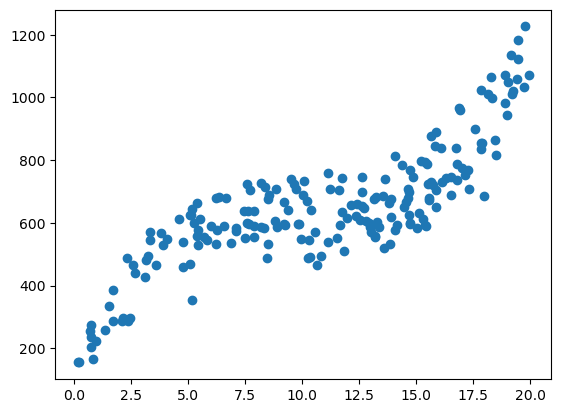

In [7]:
plt.plot(x, y, 'o');

In [8]:
x_range = np.linspace(x_lim_min, x_lim_max, 200)
y_underlying = 600 + 2 * x_range + 0.5 * (x_range - 10) ** 3 

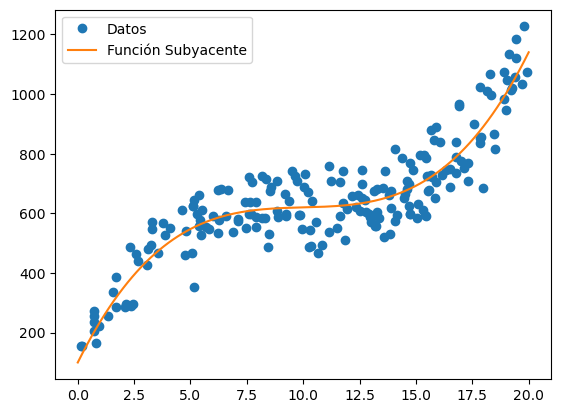

In [9]:
plt.plot(x, y, 'o', label = 'Datos');
plt.plot(x_range, y_underlying, label = 'Función Subyacente')
plt.legend(loc='best');

Nuestro trabajo será ahora, a partir de los datos sintéticos, encontrar un modelo que nos ayude a predecir y.

# 2. Preparación del dataset.

Cada fila de ($X$) corresponde a un ejemplo y tendrá asociado un elemento correspondiente en el vector($\mathbf{y}$). Cada columna, corresponderá a una variable, característica o feature.


In [10]:
x.shape

(200,)

Puede observarse que ($\mathbf{x}$) es un array de una dimensión (vector), por lo que deberíamos realizar la conversión a un array bi-dimensional (matriz), que en este caso tendrá una única columna y una fila por cada ejemplo. 

In [11]:
X = x[:, np.newaxis]
X.shape

(200, 1)

Separamos los datos en conjuntos de entrenamiento y test.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=311)

# 3. Generar con un Modelo Lineal Simple 
Primero, vamos a probar el modelo lineal: $$\widehat{y} = w_0 + w_1 * x$$

## 3.1. Ajuste del Modelo (Entrenamiento)
Utilizaremos la clase `LinearRegression` de sklearn con **los datos de entrenamiento**  para ajustar los parametros del modelo:

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

El objeto `regressor` contiene el modelo ya entrenado. Como el modelo es lineal, sus parámetros son: $$ \widehat{y} = w_0 + w_1 x = intercept\_ + coef\_[0] * x$$

In [14]:
print('Vector de coeficientes de la función lineal: ', regressor.coef_)
print('Ordenada en el origen (W0): ', regressor.intercept_)

Vector de coeficientes de la función lineal:  [27.47370402]
Ordenada en el origen (W0):  341.1538991364506


Vamos a graficar la función obtenida, junto con los puntos de entrenamiento:

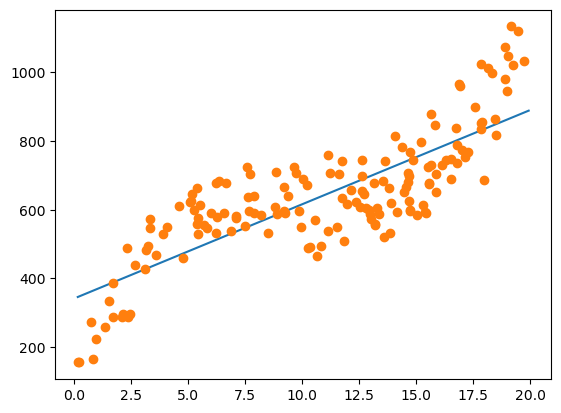

In [15]:
xlin = np.linspace(X.min(), X.max(), 200)
ylin = regressor.coef_[0] * xlin + regressor.intercept_

plt.plot(xlin, ylin)
plt.plot(X_train, y_train, 'o');

Podemos calcular la predicción para cada valor de $x$ de entrenamiento.

In [16]:
y_pred_train = regressor.predict(X_train)

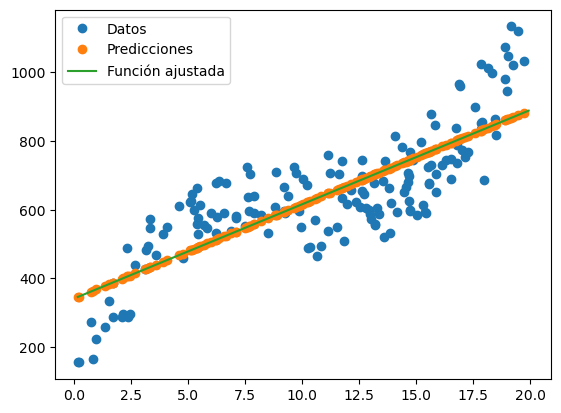

In [17]:
plt.plot(X_train, y_train, 'o', label="Datos")
plt.plot(X_train, y_pred_train, 'o', label="Predicciones")
plt.plot(xlin, ylin, label='Función ajustada')
plt.legend(loc='best')

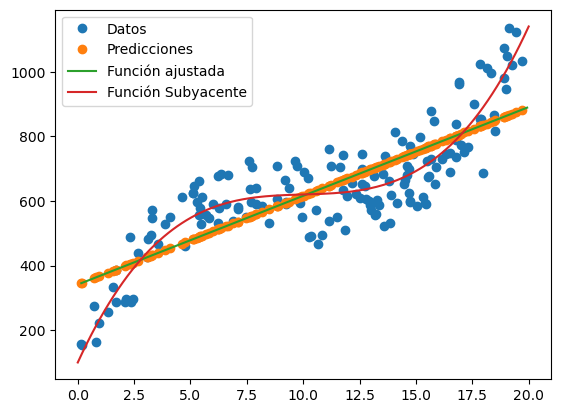

In [18]:
plt.plot(X_train, y_train, 'o', label="Datos")
plt.plot(X_train, y_pred_train, 'o', label="Predicciones")
plt.plot(xlin, ylin, label='Función ajustada')
plt.plot(x_range, y_underlying, label = 'Función Subyacente')
plt.legend(loc='best')

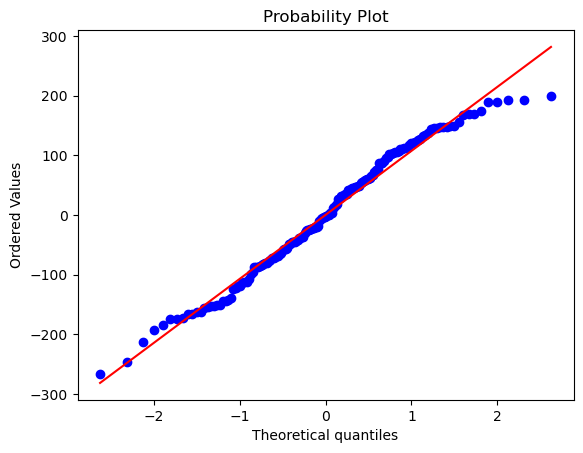

In [19]:
residuals = y_pred_train - y_train
_ = probplot(residuals, plot=plt)

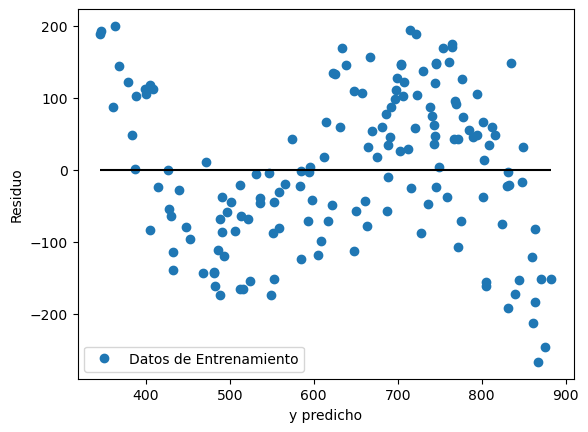

In [20]:
plt.plot(y_pred_train, residuals, 'o', label="Datos de Entrenamiento")
plt.hlines(y = 0, xmin = min(y_pred_train), xmax = max(y_pred_train), color = 'black')
plt.xlabel('y predicho')
plt.ylabel('Residuo')
plt.legend(loc='best')

## 3.2. Prueba con Datos de Validación
Ahora, probaremos que tan bien funciona con los datos de test.

In [21]:
y_pred_test = regressor.predict(X_test)

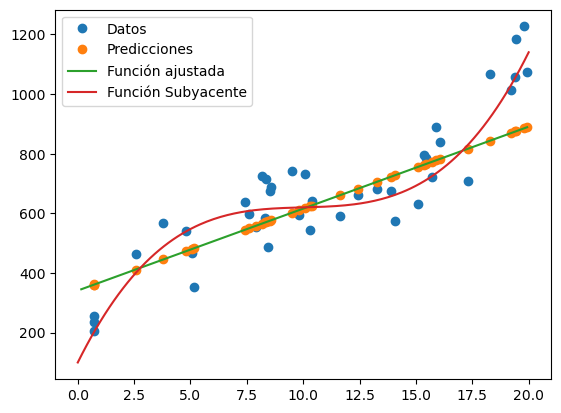

In [22]:
plt.plot(X_test, y_test, 'o', label="Datos")
plt.plot(X_test, y_pred_test, 'o', label="Predicciones")
plt.plot(xlin, ylin, label='Función ajustada')
plt.plot(x_range, y_underlying, label = 'Función Subyacente')
plt.legend(loc='best')

## 3.3. Evaluación de Desempeño





### 3.3.1. Gráfico de Residuos

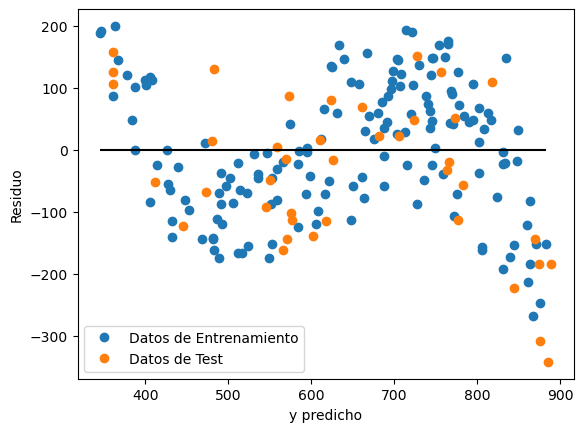

In [23]:
plt.plot(y_pred_train, y_pred_train - y_train, 'o', label="Datos de Entrenamiento")
plt.plot(y_pred_test, y_pred_test - y_test, 'o', label="Datos de Test")
plt.hlines(y = 0, xmin = min(y_pred_train), xmax = max(y_pred_train), color = 'black')
plt.xlabel('y predicho')
plt.ylabel('Residuo')
plt.legend(loc='best')

### 3.3.2. Gráfico Q-Q

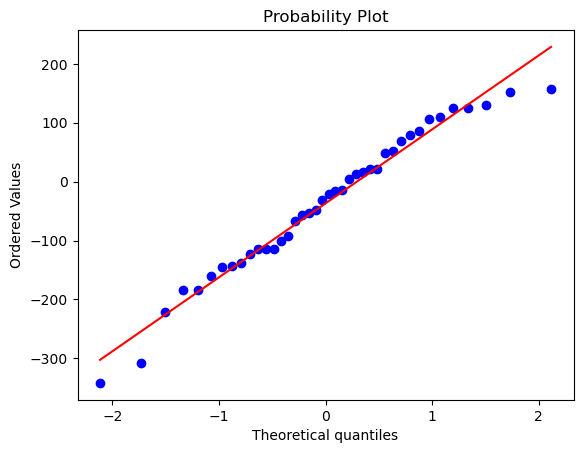

In [24]:
_ = probplot(y_pred_test - y_test, plot=plt)

### 3.3.3. Métricas

In [25]:
regressor.score(X_test, y_test)

0.7018968820760778

In [26]:
print('Error Cuadrático Medio (Mean Squared Error): %.8f' % mean_squared_error(y_test, y_pred_test))
print('Coeficiente de Determinación (Coefficient of Determination): %.8f' % r2_score(y_test, y_pred_test))

Error Cuadrático Medio (Mean Squared Error): 16178.02438930
Coeficiente de Determinación (Coefficient of Determination): 0.70189688


# 4. Regresión Polinomial

Ahora, buscaremos estimar los valores de y a partir de una función polinomial de grado m: 

$$\widehat{y} = w_0 + w_1 x + w_2 {x}^2 + w_3 {x}^3 + ... + w_m {x}^m$$



## 4.1. Creamos un transformador que genere las características polinómicas.

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_degree = 4

In [29]:
poly = PolynomialFeatures(degree = poly_degree)
X_poly_train = poly.fit_transform(X_train)

In [30]:
X_train[:5]

array([[ 3.12783437],
       [ 4.07044127],
       [ 1.34649334],
       [13.79054722],
       [10.6558257 ]])

In [31]:
X_poly_train[:5]

array([[1.00000000e+00, 3.12783437e+00, 9.78334785e+00, 3.06006917e+01,
        9.57138951e+01],
       [1.00000000e+00, 4.07044127e+00, 1.65684921e+01, 6.74410741e+01,
        2.74514931e+02],
       [1.00000000e+00, 1.34649334e+00, 1.81304431e+00, 2.44125209e+00,
        3.28712968e+00],
       [1.00000000e+00, 1.37905472e+01, 1.90179193e+02, 2.62267514e+03,
        3.61681253e+04],
       [1.00000000e+00, 1.06558257e+01, 1.13546621e+02, 1.20993301e+03,
        1.28928352e+04]])

## 4.2. Creamos el Regresor
A partir de los datos transformados, aplicamos un modelo de regresión lineal múltiple.

In [32]:
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)
y_poly_pred_train = poly_regressor.predict(X_poly_train)

## 4.3. Mostrar Resultados
### 4.3.1. Datos de Entrenamiento

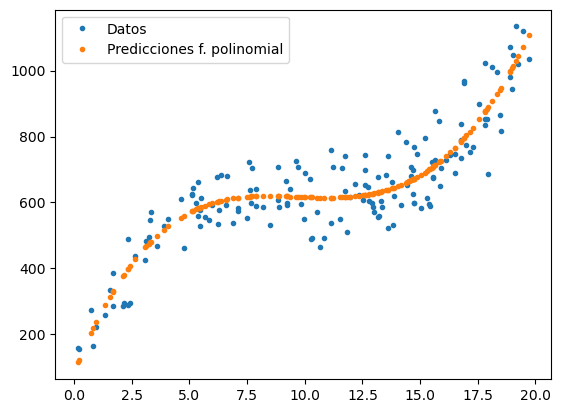

In [33]:
plt.plot(X_train, y_train, '.', label="Datos")
plt.plot(X_poly_train[:,1], y_poly_pred_train, '.', label="Predicciones f. polinomial")
plt.legend(loc='best')

In [34]:
X_range = x_range[:, np.newaxis]
X_poly_range = poly.fit_transform(X_range)
y_poly_range_pred = poly_regressor.predict(X_poly_range)

(0.0, 1000.0)

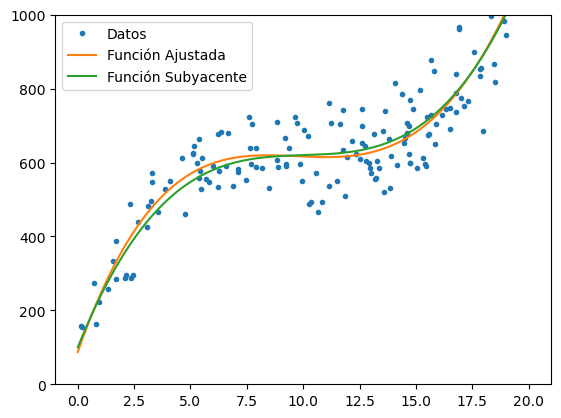

In [35]:
plt.plot(X_train, y_train, '.', label="Datos")
plt.plot(x_range, y_poly_range_pred, label = 'Función Ajustada')
plt.plot(x_range, y_underlying, label = 'Función Subyacente')
plt.legend(loc='best')
plt.ylim(top = 1000, bottom = 0)

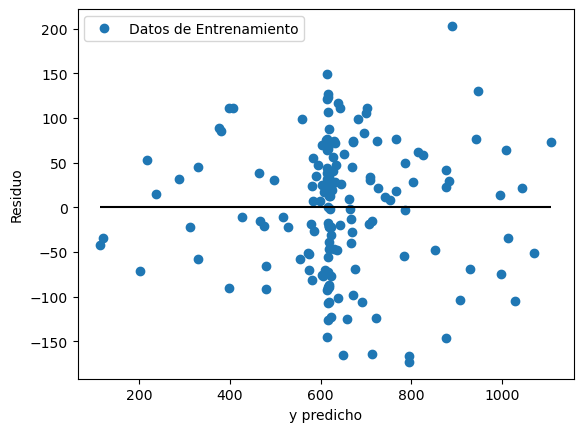

In [36]:
plt.plot(y_poly_pred_train, y_poly_pred_train - y_train, 'o', label="Datos de Entrenamiento")
plt.hlines(y = 0, xmin = min(y_poly_pred_train), xmax = max(y_poly_pred_train), color = 'black')
plt.xlabel('y predicho')
plt.ylabel('Residuo')
plt.legend(loc='best')

Gráfico Q-Q

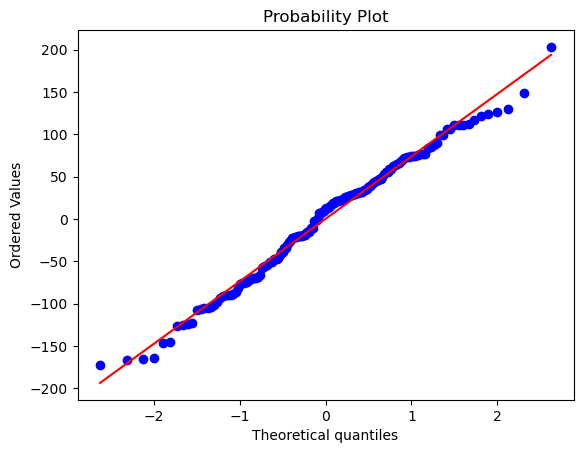

In [37]:
residuals = y_poly_pred_train - y_train
_ = probplot(residuals, plot=plt)

### 4.3.2. Datos de Test

In [38]:
X_poly_test = poly.fit_transform(X_test)
y_poly_pred_test = poly_regressor.predict(X_poly_test)

(0.0, 1000.0)

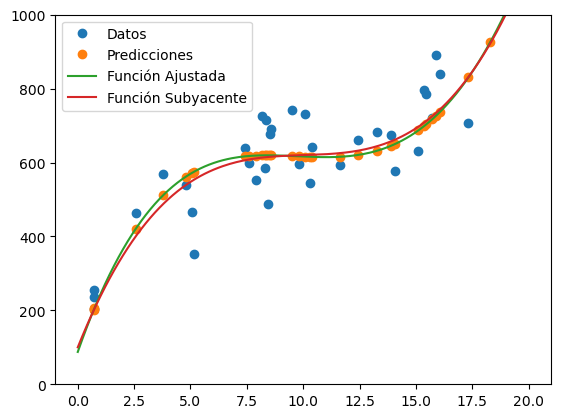

In [39]:
plt.plot(X_test, y_test, 'o', label="Datos")
plt.plot(X_test, y_poly_pred_test, 'o', label="Predicciones")
plt.plot(x_range, y_poly_range_pred, label = 'Función Ajustada')
plt.plot(x_range, y_underlying, label = 'Función Subyacente')
plt.legend(loc='best')
plt.ylim(top = 1000, bottom = 0)

## 4.4. Resultados del Modelo Obtenido

### 4.4.1. Gráfico de Residuos

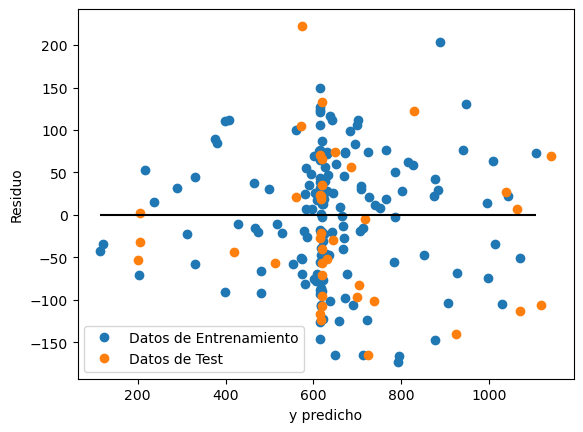

In [40]:
plt.plot(y_poly_pred_train, y_poly_pred_train - y_train, 'o', label="Datos de Entrenamiento")
plt.plot(y_poly_pred_test, y_poly_pred_test - y_test, 'o', label="Datos de Test")
plt.hlines(y = 0, xmin = min(y_poly_pred_train), xmax = max(y_poly_pred_train), color = 'black')
plt.xlabel('y predicho')
plt.ylabel('Residuo')
plt.legend(loc='best')

### 4.4.2. Métricas de Error

In [41]:
poly_regressor.score(X_poly_test, y_test)

0.8664997910392248

In [42]:
print('Error Cuadrático Medio (Mean Squared Error): %.8f' % mean_squared_error(y_test, y_poly_pred_test))
print('Coeficiente de Determinación (Coefficient of Determination): %.8f' % r2_score(y_test, y_poly_pred_test))

Error Cuadrático Medio (Mean Squared Error): 7245.04209008
Coeficiente de Determinación (Coefficient of Determination): 0.86649979


### 4.4.3. Modelo Obtenido

In [43]:
print('Vector de coeficientes de la función lineal: ', poly_regressor.coef_)
print('Ordenada en el origen (W0): ', poly_regressor.intercept_)

Vector de coeficientes de la función lineal:  [ 0.00000000e+00  1.73797383e+02 -1.90976593e+01  7.47414344e-01
 -4.69566533e-03]
Ordenada en el origen (W0):  87.51673766406634
